In [157]:
import pandas as pd
import seaborn as sb
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [158]:
#Q1 We are going to be adding the CSV files into the notebook using CSV files
calendar_df = pd.read_csv(r"C:\Users\ssbn0\Downloads\Data Mining\AirBnB_Lab\CSV\calendar.csv")
reviews_df = pd.read_csv(r"C:\Users\ssbn0\Downloads\Data Mining\AirBnB_Lab\CSV\reviews.csv")
listings_df = pd.read_csv(r"C:\Users\ssbn0\Downloads\Data Mining\AirBnB_Lab\CSV\listings.csv")

#A couple of the things I notice, the first thing is that price is for many listings in calendar_df is NaN. 
#I'm not sure what's going on there
#This is very similar to the listings have NaN on the review scores, license, jurisdiction_names and reviews per month
#Reviews is more complete here.
#I'm not sure how you mess up reviews per month but it probably is bad tracking from the early days of AirBnB.
#The NaN in license is explained by many listings not requiring a license

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [159]:
#Q2 We are going to be doing some sentiment analysis. We first import the positive words 
pos_words = pd.read_csv(r"C:\Users\ssbn0\Downloads\Data Mining\AirBnB_Lab\CSV\positive_words.csv")
neg_words = pd.read_csv(r"C:\Users\ssbn0\Downloads\Data Mining\AirBnB_Lab\CSV\negative_words.csv", encoding = 'latin-1')
#We define these lists as a seperate list for ease of use in methods later
neg = set(neg_words.iloc[:, 0].str.lower())
pos = set(pos_words.iloc[:, 0].str.lower())


In [160]:
#Q2(cont) Here we will be doing the sentiment analysis by hand. The cells are split up for efficiency
pos_simple = []
neg_simple = []
#This method counts the number of positive words in each review and constructs a total word count
def sentiment_analysis(review):
    pos_counter = 0
    neg_counter = 0
    # Convert the review text to lowercase and split it into words
    rev_list = review.lower().split(' ')
    

    # Iterate through each word in the review
    for word in rev_list:
        # Check if the word is in the positive words list
        if word in pos:
            pos_counter += 1
        # Check if the word is in the negative words list
        if word in neg:
            neg_counter += 1

    # Calculate the total number of words in the review
    total_words = len(rev_list)

    # Calculate positivity and negativity scores
    positivity_simple = pos_counter / total_words
    negativity_simple = neg_counter / total_words

    # Return the positivity and negativity scores as a tuple
    return positivity_simple, negativity_simple

for index, row in reviews_df.iterrows():
    review = str(row['comments'])
    #We get the word ratio of the analysis
    word_ratio = sentiment_analysis(review)
    #We append it to our list, and then we move down
    pos_simple.append(word_ratio[0])
    neg_simple.append(word_ratio[1])
#We then create our new columns
reviews_df['positivity_simple'] = pos_simple
reviews_df['negativity_simple'] = neg_simple

In [161]:
#Here we do the imports for ntlk
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
#from textblob import TextBlob
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssbn0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ssbn0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [162]:
#(Q2 cont) We will now use the python file to do some more sophisticated analysis.
sentiment_analysis_columns = ['negativity', 'neutrality', 'positivity', 'compound']
#So we don't add duplicate columns
#reviews_df = reviews_df.drop(['positivity', 'negativity', 'compound', 'neutrality'], axis=1)

sid = SentimentIntensityAnalyzer()

expanded_text_dataset = []
column_names = list(reviews_df.columns.values)
all_columns = column_names + sentiment_analysis_columns
text_segment_list = list(reviews_df['comments'])
for j in range(len(text_segment_list)):
    row_info = list(reviews_df.iloc[j])
    text = text_segment_list[j]
    ##Sentiment analysis
    try:
        ss = sid.polarity_scores(text)
        negativity = ss['neg']
        neutrality = ss['neu']
        positivity = ss['pos']
        compound = ss['compound']
        temp_data = row_info + [negativity, neutrality, positivity, compound]
        expanded_text_dataset.append(temp_data)
    except:
        print('Sentiment analysis not done: ' + str(j) + ' / ' + str(len(reviews_df)))
        temp_data = row_info + [0, 0, 0, 0]
        expanded_text_dataset.append(temp_data)
##Storing the results in a dataset
reviews_df = pd.DataFrame(expanded_text_dataset, columns = all_columns)


Sentiment analysis not done: 1077 / 68275
Sentiment analysis not done: 2786 / 68275
Sentiment analysis not done: 7483 / 68275
Sentiment analysis not done: 7827 / 68275
Sentiment analysis not done: 8362 / 68275
Sentiment analysis not done: 11415 / 68275
Sentiment analysis not done: 11745 / 68275
Sentiment analysis not done: 13838 / 68275
Sentiment analysis not done: 14131 / 68275
Sentiment analysis not done: 16185 / 68275
Sentiment analysis not done: 18191 / 68275
Sentiment analysis not done: 19098 / 68275
Sentiment analysis not done: 19986 / 68275
Sentiment analysis not done: 21122 / 68275
Sentiment analysis not done: 21720 / 68275
Sentiment analysis not done: 22215 / 68275
Sentiment analysis not done: 25043 / 68275
Sentiment analysis not done: 25446 / 68275
Sentiment analysis not done: 26939 / 68275
Sentiment analysis not done: 27128 / 68275
Sentiment analysis not done: 28326 / 68275
Sentiment analysis not done: 31537 / 68275
Sentiment analysis not done: 32174 / 68275
Sentiment analys

In [163]:
#(Q3) We will be making lists that contain our calculated means
#I created a GroupBy object based on 'listing_id' in reviews_df
groupList = reviews_df.groupby('listing_id')

# I create empty lists to store the calculated means
positivity_simple_mean = []
negativity_simple_mean = []
positivity_mean = []
negativity_mean = []
neutrality_mean = []
compound_mean = []

#I iterate through listings_df and calculate means for each grouping
for index, row in listings_df.iterrows():
    listing_id = row['listing_id']
    if listing_id in groupList.groups:
        specific_group = groupList.get_group(listing_id)
        
        positivity_simple_mean.append(np.mean(specific_group['positivity_simple']).astype(float))
        negativity_simple_mean.append(np.mean(specific_group['negativity_simple']).astype(float))
        positivity_mean.append(np.mean(specific_group['positivity'].astype(float)))
        negativity_mean.append(np.mean(specific_group['negativity'].astype(float)))
        neutrality_mean.append(np.mean(specific_group['neutrality'].astype(float)))
        compound_mean.append(np.mean(specific_group['compound'].astype(float)))
    else:
        # Handle the case when there is no group for the 'listing_id'
        positivity_simple_mean.append(0)
        negativity_simple_mean.append(0)
        positivity_mean.append(0)
        negativity_mean.append(0)
        neutrality_mean.append(0)
        compound_mean.append(0)
# Add the calculated means to listings_df
listings_df['positivity_simple_mean'] = positivity_simple_mean
listings_df['negativity_simple_mean'] = negativity_simple_mean
listings_df['positivity_mean'] = positivity_mean
listings_df['negativity_mean'] = negativity_mean
listings_df['neutrality_mean'] = neutrality_mean
listings_df['compound_mean'] = compound_mean


In [164]:
#(Q4) We first create a new dataframe with only the variables below
new_df = listings_df[['property_type','room_type','accommodates','bathrooms','bedrooms']]

#We transform this into a set of transactions that the apriori algorithim can handle
#Here we are storing all the unique values each set can have as a total
trans_list = []
for index,rows in new_df.iterrows():
    #We edit the rows to differentiate the numerical rows to make sure 1 bath and 1 bed isn't the same thing
    bathrooms = str(rows['bathrooms']) + " bath(s)"
    bedrooms = str(rows['bedrooms']) + " bed(s)"
    accommodates = str(rows['accommodates']) + " cap"
    #We create our transaction and then we add it to transaction list
    transaction = [bathrooms, str(rows['property_type']), accommodates, str(rows['room_type']), bedrooms]
    trans_list.append(transaction)
te = TransactionEncoder()
te_ary = te.fit(trans_list).transform(trans_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

#We run apriori
apriori(df, min_support=0.1,use_colnames=True).sort_values(by = 'support')
#apriori(df, min_support=0.2,use_colnames=True).sort_values(by = 'support')

,support,itemsets
46,0.100418,"(1.0 bath(s), 2.0 bed(s), Entire home/apt)"
16,0.100418,"(1.0 bath(s), 2.0 bed(s))"
30,0.101255,"(2.0 bath(s), Entire home/apt)"
38,0.102929,"(1.0 bed(s), 1 cap, Private room)"
13,0.102929,"(1 cap, Private room)"
...,...,...
9,0.593305,(Entire home/apt)
19,0.597768,"(1.0 bath(s), Apartment)"
2,0.663598,(1.0 bed(s))
8,0.728591,(Apartment)


In [165]:
#(q5) We are generating a list of all items
p_types = set(new_df['property_type'].unique())
room_type = set(new_df['room_type'].unique())
#We add the strings at the end to make sure we are differentiating between different things
accom = {str(new_df['accommodates'].unique()[i]) + " cap" for i in range (0,len(new_df['accommodates'].unique())) }
bath = {str(new_df['bathrooms'].unique()[i]) + " bath(s)" for i in range (0,len(new_df['bathrooms'].unique())) }
bed = {str(new_df['bedrooms'].unique()[i]) + " bed(s)" for i in range (0,len(new_df['bedrooms'].unique())) }
items = set()
items = items|p_types
items = items|room_type
items = items|bath
items = items|accom
items = items|bed

In [166]:
#(Q5 cont) I call this method apriori-anu since I am coding it and my name is anu.
def apriori_anu(data,minsup):
    apriori = pd.DataFrame()
    support = []
    itemsets = [[]]
    finalset = []
#Here I first check frequent itemsets of length 1.
    for item in items:
        itemset = set()
        itemset.add(item)
        counter = 0
        for d in data:
            #This method is subset was super helpful. I converted many things to sets to make that work.
            if itemset.issubset(set(d)):
                counter += 1
        #This calculates the support
        supp = counter/len(data)
        #This is the bread and butter, if the itemset is well supported then it goes to the next stage
        #Other wise it gets pruned
        if(supp > minsup):
            support.append(supp)
            #Itemsets are there to take in the data used by the next stage
            itemsets[0].append(itemset)
            #Final set is used to be the column in the solution dataframe
            finalset.append(itemset)
    #The reason I stop at 5 is because I know that no item set can be bigger than 5 items 
    #since anything with 6 would have 0 support
    for i in range (1,5):
        #got to make sure there is something to add elements to
        newsets = []
        itemsets.append(newsets)
        for mset in itemsets[i-1]:
            #This further reduced time taken as I only try adding things that had minimum support in the first place
            for item in itemsets[0]:
                #This reduced time even further by not making me rerun trials
                if item.issubset(mset):
                    break
                kset = item|mset
                counter = 0
                for d in data:
                    if kset.issubset(set(d)):
                        counter += 1
                supp = counter/len(data)
                if(supp > minsup):
                    support.append(supp)
                    itemsets[i].append(kset) 
                    finalset.append(kset)
    #We add the columns and then we finish
    apriori['support'] = support
    apriori['itemsets'] = finalset
    return apriori
#This method is slightly faster (imo) then the prewritten one, which I am very happy about
apriori_anu(trans_list,0.2).sort_values(by='support')

,support,itemsets
29,0.216179,"{1.0 bed(s), 1.0 bath(s), 2 cap, Apartment}"
30,0.217573,"{1.0 bed(s), 1.0 bath(s), Apartment, Entire ho..."
21,0.219247,"{1.0 bed(s), Private room, Apartment}"
12,0.219247,"{Private room, Apartment}"
22,0.225105,"{1.0 bed(s), Apartment, Entire home/apt}"
20,0.233752,"{1.0 bed(s), 2 cap, Apartment}"
8,0.238494,"{2 cap, Private room}"
19,0.238494,"{1.0 bed(s), 2 cap, Private room}"
25,0.247141,"{1.0 bed(s), 1.0 bath(s), Entire home/apt}"
9,0.256904,"{1.0 bed(s), Entire home/apt}"


In [178]:
#(Q6) We are going to construct a multilinear regression
# I defined my independent variables (X) and dependent variable (y)
#I had to clean up my data to make it reasonable to read
listings_df['host_response_rate_float'] = listings_df['host_response_rate'].str.replace('%', '').astype(float)
listings_df['price_float'] = listings_df['price'].str.replace('$', '').str.replace(',','').astype(float)
X = listings_df[['host_response_rate_float', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','positivity_mean',
'negativity_mean',
'positivity_simple_mean',
'negativity_simple_mean']]
y = listings_df['price_float']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# I split my data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model, we create two since SKlearn is bad at standard error and I didn't want to do linear algebra
model = LinearRegression()
model.fit(X_train, y_train)
#We must add a constant to do some stuff with training data
X_train_int = sm.add_constant(X_train)
modelSE = sm.OLS(y_train,X_train_int)
results = modelSE.fit()

# Make predictions on the test set, we use y_pred here
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
standardError = results.bse
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
#print(f'Standard Error: {standardError}')
print(results.summary())
print(listings_df['price_float'].min())

Mean Squared Error: 34448.33059329268
R-squared: 0.011251417336354486
Coefficients: [-2.56652694e-02  1.63798460e+00 -1.19449063e+01  1.68282039e+01
 -1.32424300e+01 -6.74802237e+00 -1.58999961e+02 -2.09374364e+02
  2.53670259e+02  5.28605303e+02]
Intercept: 193.13973405901692
                            OLS Regression Results                            
Dep. Variable:            price_float   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.808
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.82e-12
Time:                        01:37:20   Log-Likelihood:                -18143.
No. Observations:                2868   AIC:                         3.631e+04
Df Residuals:                    2857   BIC:                         3.637e+04
Df Model:                          10                                         
Covariance 

In [168]:
#(Q7) The same as Q6 with the added boundry of PCA
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#I initialize the standard scaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 3)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
#We turn X_train into a dataframe for part 8
column_names = ['Var1', 'Var2', 'Var3']
Xtrain_df = pd.DataFrame(X_train, columns=column_names)
#We then take the explained variance 
explained_variance = pca.explained_variance_ratio_

# Create a linear regression model
classifier = LinearRegression()
classifier.fit(X_train, y_train)
#We do similar things to the last paprt
X_train_int = sm.add_constant(X_train)
modelSE = sm.OLS(y_train,X_train_int)
results = modelSE.fit()

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Get the coefficients and intercept
coefficients = classifier.coef_
intercept = classifier.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
#print(f'Standard Error: {standardError}')
print(results.summary())

Mean Squared Error: 34599.82029157493
R-squared: 0.006903304615505257
Coefficients: [-3.42632011 -6.18303905 -1.2264428 ]
Intercept: 173.73849372384936
                            OLS Regression Results                            
Dep. Variable:            price_float   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.419
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           0.000249
Time:                        01:34:01   Log-Likelihood:                -18172.
No. Observations:                2868   AIC:                         3.635e+04
Df Residuals:                    2864   BIC:                         3.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

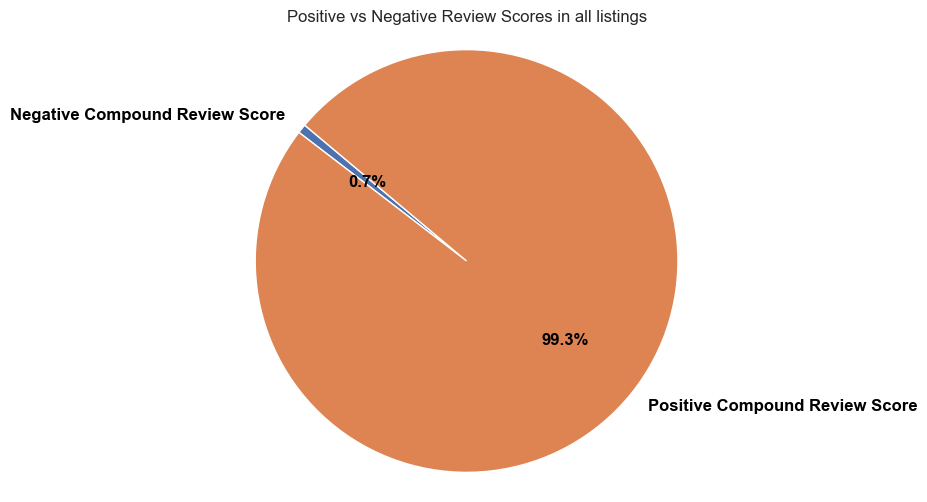

In [169]:
#(Q8) We start with the Pie plot

# We need to calculate the amount compound is negative
count = 0
for index,row in listings_df.iterrows():
    if row['compound_mean'] < 0:
        count+=1
#We are just making percentage here
data = [100*count/len(listings_df),100 - 100*count/len(listings_df)]  # Example data as percentages
labels = ['Negative Compound Review Score', 'Positive Compound Review Score']

# Here I created the pie chart
plt.figure(figsize=(6, 6))
sb.set(style="whitegrid")
sb.color_palette("pastel")
index, texts, autotexts = plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})

# I set the aspect ratio to be equal, so the pie will be circular
plt.axis('equal')

# I add the data labels
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')

# Display the pie chart
plt.title('Positive vs Negative Review Scores in all listings')
plt.show()


C:\Users\ssbn0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


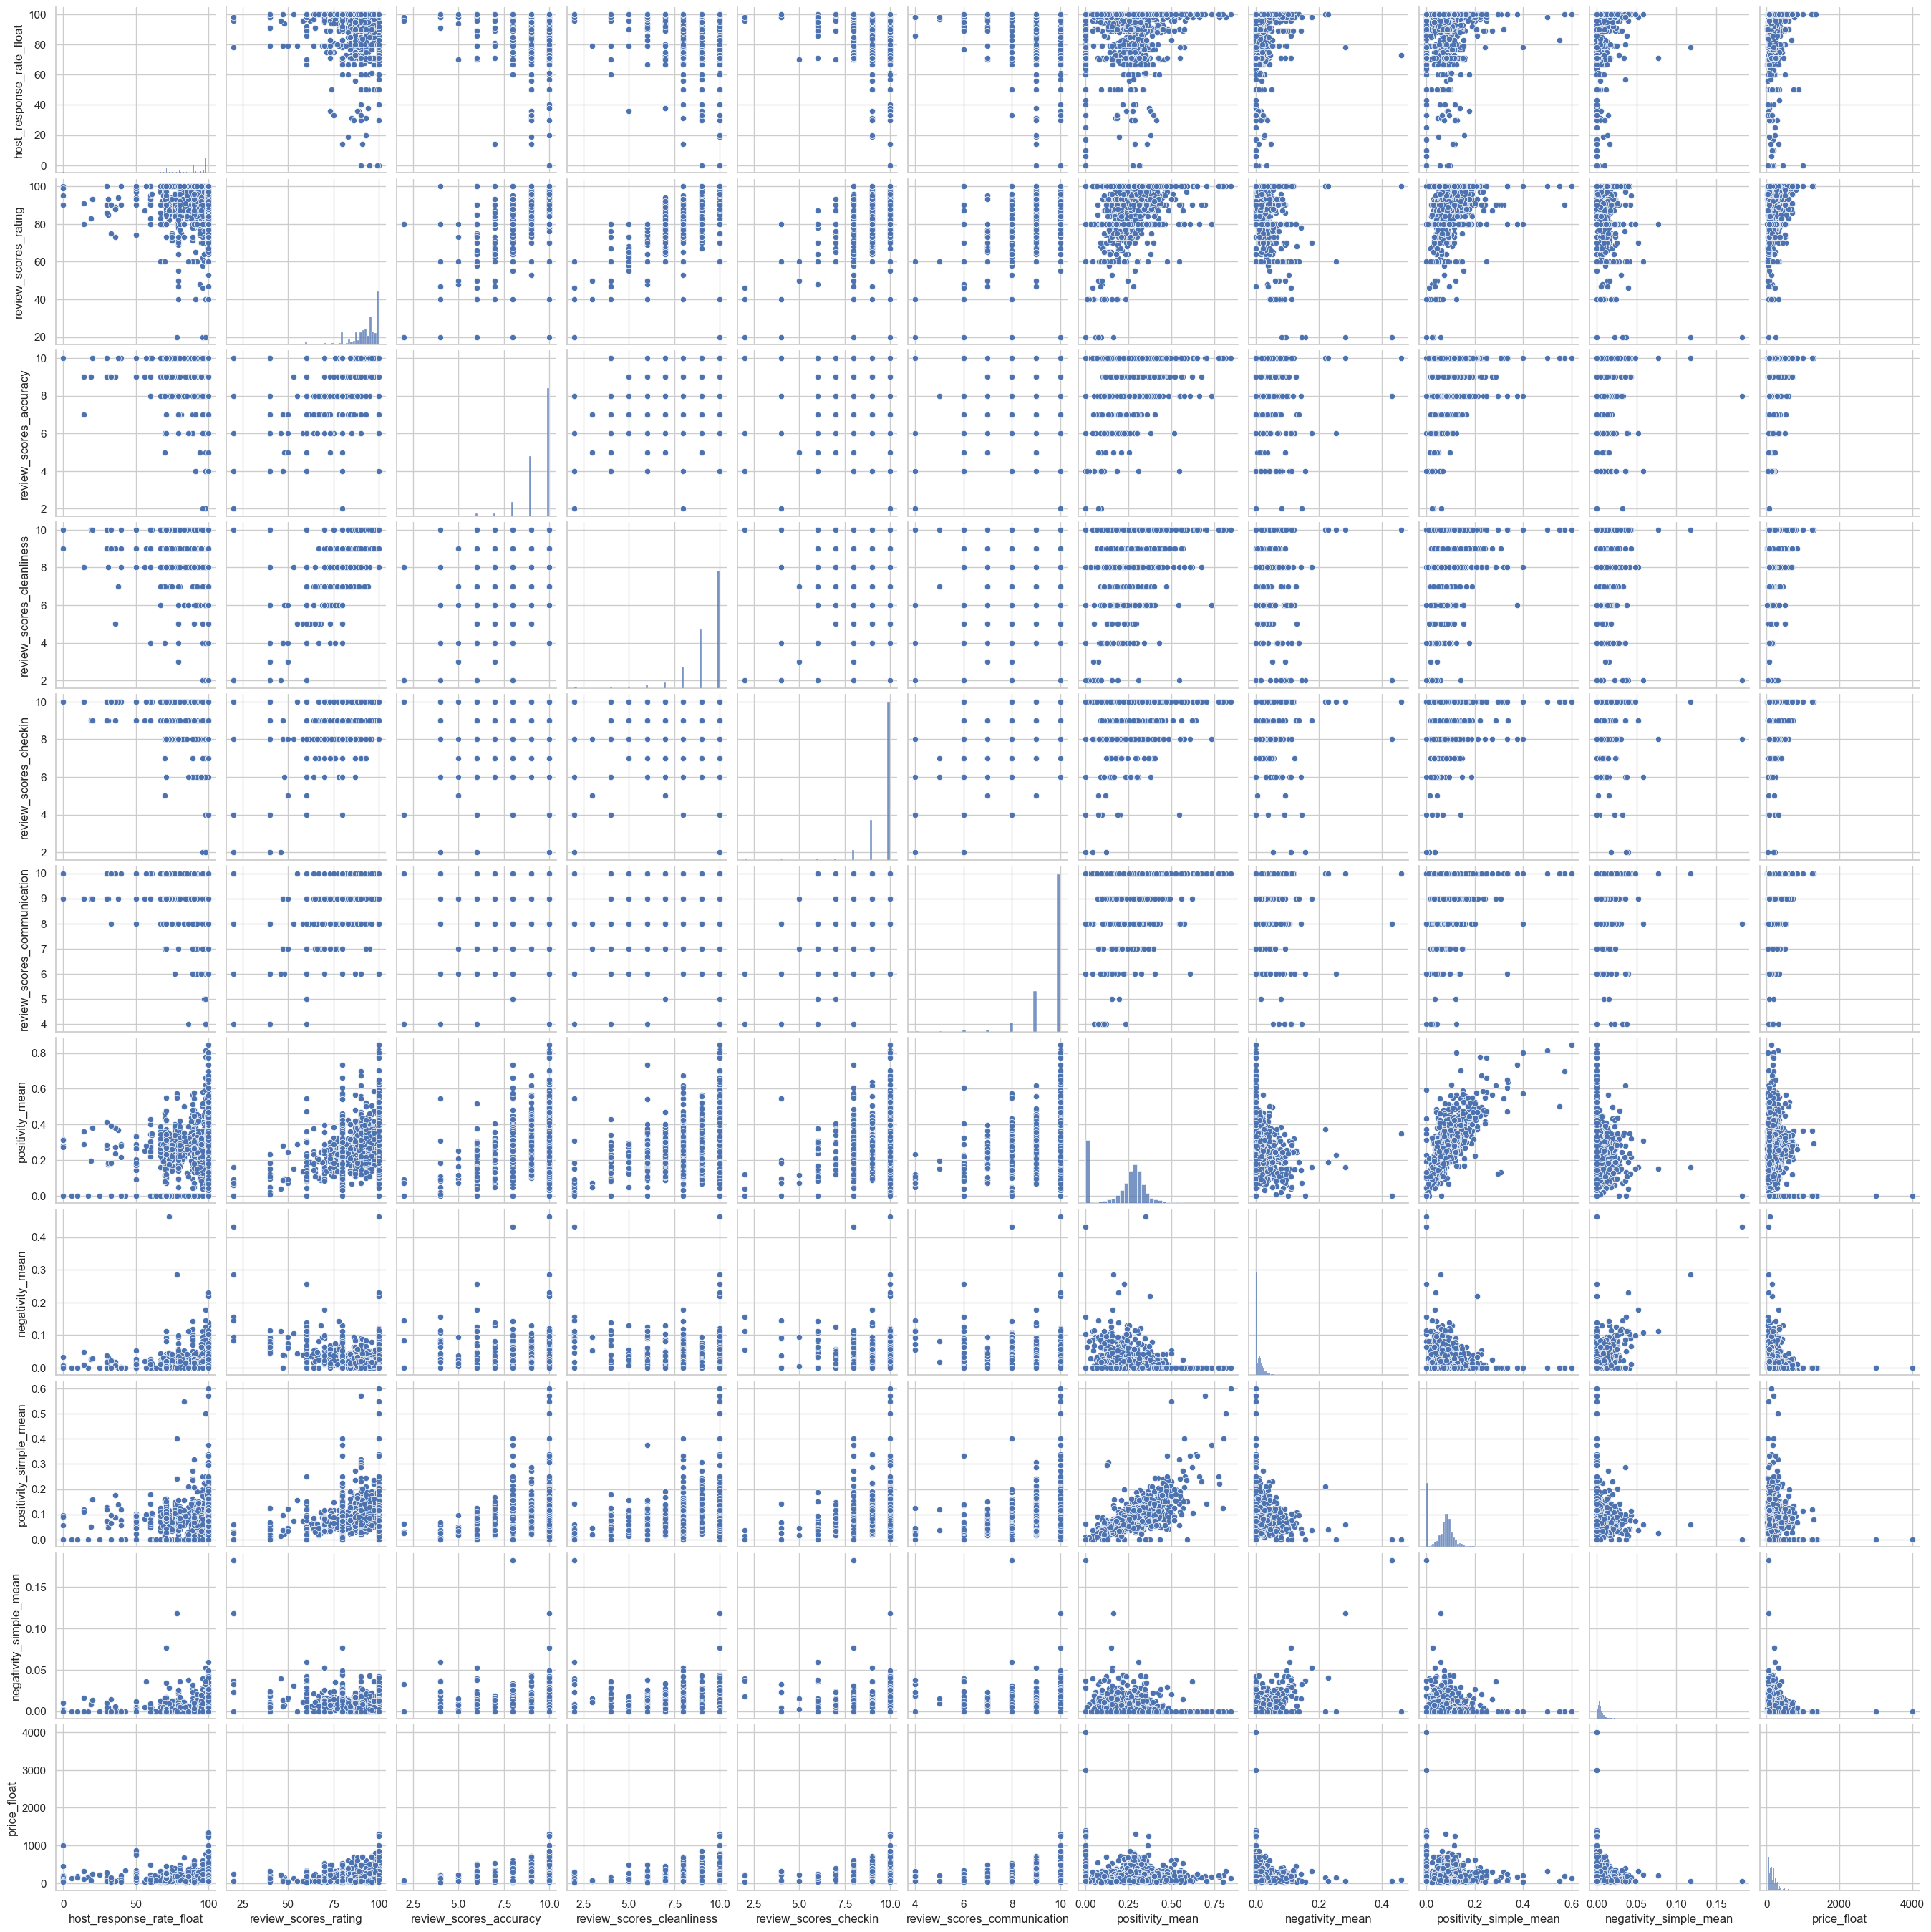

In [170]:
#(Q8 cont) I make the pairplots for the variables in Q6 and Q7
pairplot_df = listings_df[['host_response_rate_float', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','positivity_mean',
'negativity_mean',
'positivity_simple_mean',
'negativity_simple_mean','price_float']]
sb.pairplot(pairplot_df)

C:\Users\ssbn0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


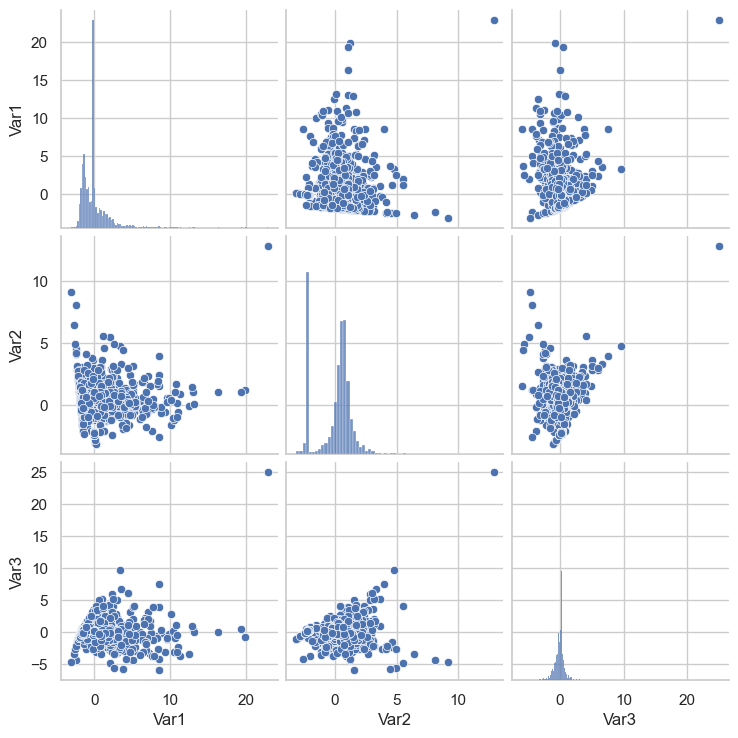

In [171]:
sb.pairplot(Xtrain_df)

In [183]:
print(len(reviews_df))
print(len(listings_df))
print(len(calendar_df))
calendar_df.tail(20)

68275
3585
1308890


,listing_id,date,available,price
1308870,14504422,2016-09-25,t,$65.00
1308871,14504422,2016-09-24,t,$62.00
1308872,14504422,2016-09-23,t,$62.00
1308873,14504422,2016-09-22,t,$62.00
1308874,14504422,2016-09-21,t,$62.00
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00
1308879,14504422,2016-09-16,t,$62.00
